# Letters With Angelica

![SegmentLocal](img/3.gif "segment")


![SegmentLocal](img/1.jpg "segment")

In [143]:
import os             
folder = "./data/Interactions with Angelica/"
txt_files = os.listdir(folder)   # imagine you're one directory above test dir
print(txt_files)

['From Alexander Hamilton to Angelica Church, 22 January [1800].txt', 'From Alexander Hamilton to Angelica Church, 23 October 1794.txt', 'From Alexander Hamilton to Angelica Church, 27 December 1793.txt', 'From Alexander Hamilton to Angelica Church, 31 January 1791.txt', 'From Alexander Hamilton to Angelica Church, 8 December 1794.txt', 'From Alexander Hamilton to Angelica Church, November 1791.txt', 'From Alexander Hamilton to Angelica Church, [19–20 June 1796].txt', 'From Alexander Hamilton to Angelica Church, [2 October 1791].txt', 'From Alexander Hamilton to Angelica Church, [24 September 1796].txt', 'From Alexander Hamilton to Angelica Church, [25 June 1796].txt', 'From Alexander Hamilton to Angelica Church, [3 August 1785].txt', 'From Alexander Hamilton to Angelica Church, [6 December 1787].txt', 'From Alexander Hamilton to Angelica Church, [6 March 1795].txt', 'From Alexander Hamilton to Angelica Church, [7 January 1790].txt', 'From Alexander Hamilton to Angelica Church, [8 Nove

In [144]:
import pandas as pd
corpus = []

for file_path in txt_files:
    with open(folder+file_path,encoding='utf8') as f_input:
        corpus.append(f_input.read())

print(corpus[1])

I am thus far my dear Angelica on my way to attack and subdue the wicked insurgents of the West. But you are not to promise yourself that I shall have any trophies to lay at your feet. A large army has cooled the courage of those madmen & the only question seems now to be how to guard best aganst the return of the phrenzy.

You must not take my being here for a proof that I continue a quixot. In popular governments ’tis useful that those who propose measures should partake in whatever dangers they may involve. Twas very important there should be no mistake in the management of the affair—and I might contribute to prevent one. I wish to have every thing well settled for Mr. Church & you, that when you come, you may tread on safe ground. Assure him that the insurrection will do us a great deal of good and add to the solidity of every thing in this country. Say the same to Mr Jay1 to whom I have not time to write & to Mr Pinkney.2

God bless You Dear Sister & make you as happy as I wish y

In [145]:
print(len(corpus))

25


In [146]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/acham/Desktop/robotmua-640cce327819.json"
#print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
# Instantiates a client
client = language.LanguageServiceClient()
# The text to analyze

neg = 0
pos = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)

    #print('Text: {}'.format(text))
    analysis = ''
    if sentiment.score == 0:
        analysis = 'Neutral'
        neu+=1
    elif sentiment.score < 0:
        analysis = 'Negative'
        neg+=1
    elif sentiment.score > 0 and sentiment.score < 0.5 :
        analysis = 'Slightly Positive'
        s_pos+=1
    else:
        analysis = 'Positive'
        pos+=1
    print('Document: '+ txt_files[i][:-4] )
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))
    print("")
    print("")
sentiment_analysis = [pos, s_pos, neu, neg]
names_analysis = ["Positive", "Slightly Positive", "Neutral", "Negative"]


    #print('Sentiment: {}'.format(response))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Document: From Alexander Hamilton to Angelica Church, 22 January [1800]
Sentiment Prediction: 0.10000000149011612, Sentiment Analysis: Slightly Positive


Document: From Alexander Hamilton to Angelica Church, 23 October 1794
Sentiment Prediction: 0.10000000149011612, Sentiment Analysis: Slightly Positive


Document: From Alexander Hamilton to Angelica Church, 27 December 1793
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: From Alexander Hamilton to Angelica Church, 31 January 1791
Sentiment Prediction: 0.10000000149011612, Sentiment Analysis: Slightly Positive


Document: From Alexander Hamilton to Angelica Church, 8 December 1794
Sentiment Prediction: 0.10000000149011612, Sentiment Analysis: Slightly Positive


Document: From Alexander Hamilton to Angelica Church, November 1791
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: From Alexander Hamilton to Angelica Church, [19–20 June 1796]
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Docu

In [147]:
import plotly.graph_objects as go

#print(sentiment_analysis)

#print(list(sentiment_analysis.values))
fig = go.Figure(data=[go.Pie(labels=names_analysis, values=sentiment_analysis, title="Pie Chart of Sentiment Analysis of Letters Between Angelica and Alexander")])
fig.show()

In [148]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []

numbers = []

consumers = []

events = []

locations = []

organizations = []

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    person = []
    number = []
    consumer = []
    event = []
    location = []
    organization = []
    
    for j in range(len(response.entities)):
        if (response.entities[j].type) == 1:
            person.append(response.entities[j].name)
            persons.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 12:
            number.append(response.entities[j].name)
            numbers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 6:
            consumer.append(response.entities[j].name)
            consumers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 4:
            event.append(response.entities[j].name)
            events.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 2:
            location.append(response.entities[j].name)
            locations.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 3:
            organization.append(response.entities[j].name)
            organizations.append(str(response.entities[j].name))
        
    print('Person Entities Named in '+txt_files[i][:-4] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+txt_files[i][:-4] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+txt_files[i][:-4] + " Letter")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+txt_files[i][:-4] + " Letter")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+txt_files[i][:-4] + " Letter")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+txt_files[i][:-4] + " Letter")
    print(organization)
    org += len(organization)
    print("")
    print("")
        
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Person Entities Named in From Alexander Hamilton to Angelica Church, 22 January [1800] Letter
['fool', 'lady', 'Church', 'father', 'Margaret', 'father', 'mother', 'Trumbull2', 'Rensselaer3', 'Church', 'Adieu Dr', 'friends', 'friends', 'family']

Number Entities Named in From Alexander Hamilton to Angelica Church, 22 January [1800] Letter
['1']

Consumer Entities Named in From Alexander Hamilton to Angelica Church, 22 January [1800] Letter
['fatigues']

Event Entities Named in From Alexander Hamilton to Angelica Church, 22 January [1800] Letter
['meeting', 'reception', 'occasion', 'Dinner', 'departure']

Location Entities Named in From Alexander Hamilton to Angelica Church, 22 January [1800] Letter
['New York']

Organization Entities Named in From Alexander Hamilton to Angelica Church, 22 January [1800] Letter
[]


Person Entities Named in From Alexander Hamilton to Angelica Church, 23 October 1794 Letter
['Angelica', 'insurgents', 'Church', 'Jay1', 'Twas', 'Pinkney.', 'Sister', 'God', 

Person Entities Named in From Alexander Hamilton to Angelica Church, [6 December 1787] Letter
['self2', 'lover', 'Church', 'husband', 'widower', 'Betsey', 'lover', 'mistress', 'lady', 'Churchs', 'friend', 'ladies', 'mother', 'father', 'no one', 'member', 'Hamilton']

Number Entities Named in From Alexander Hamilton to Angelica Church, [6 December 1787] Letter
['1787', '6', 'five', '5', '3', 'forty', 'one', '6']

Consumer Entities Named in From Alexander Hamilton to Angelica Church, [6 December 1787] Letter
[]

Event Entities Named in From Alexander Hamilton to Angelica Church, [6 December 1787] Letter
['summer heats', 'events']

Location Entities Named in From Alexander Hamilton to Angelica Church, [6 December 1787] Letter
['mine', 'South of France', 'deserts', 'office', 'Europe', 'Adieu ma chere', 'New York']

Organization Entities Named in From Alexander Hamilton to Angelica Church, [6 December 1787] Letter
['Mrs. A Church', 'Congress']


Person Entities Named in From Alexander Hamil

Person Entities Named in To Alexander Hamilton from Angelica Church, [20 January 1797] Letter
['gentleman2', 'Mon tres cher Monsieur', 'friend', 'children', 'Sterne', 'friend', 'Carosposa', 'King', 'president']

Number Entities Named in To Alexander Hamilton from Angelica Church, [20 January 1797] Letter
['4', '1797', '1', '20']

Consumer Entities Named in To Alexander Hamilton from Angelica Church, [20 January 1797] Letter
[]

Event Entities Named in To Alexander Hamilton from Angelica Church, [20 January 1797] Letter
[]

Location Entities Named in To Alexander Hamilton from Angelica Church, [20 January 1797] Letter
['America', 'home']

Organization Entities Named in To Alexander Hamilton from Angelica Church, [20 January 1797] Letter
[]


Person Entities Named in To Alexander Hamilton from Angelica Church, [5–7 November 1789] Letter
['Betsey', 'friends', 'Baron2', 'Brother', 'Betsy', 'passengers', 'Brother', 'Brother endeaver', 'Brother', 'de petits folies', 'friends', 'Angelica', 'B

In [177]:
types1 = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [178]:
import plotly.graph_objects as go

#print(sentiment_analysis)

#print(list(sentiment_analysis.values))
fig = go.Figure(data=[go.Pie(labels=types1, values=total_num, title="Pie Chart of Entity Analysis of Letters Between Angelica and Alexander")])
fig.show()

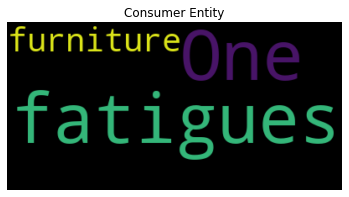

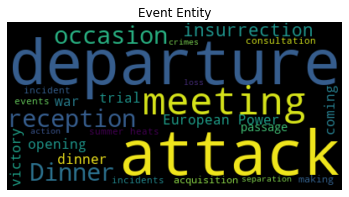

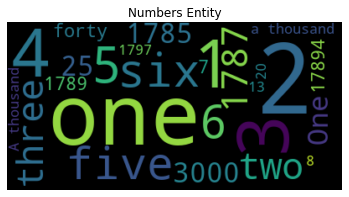

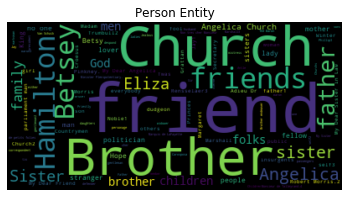

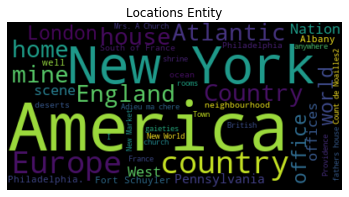

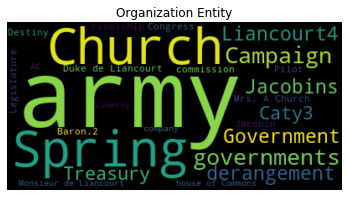

In [173]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))


# Display the generated image:

plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(events))


# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))


# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(persons))


# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(locations))


# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))


# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [181]:
a = []
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    
    
    
    for j in range(len(response2.tokens)):
        a.append((response2.tokens[j].part_of_speech))
    #    print('Syntax: {}'.format(response2[j]))    
    #print('Sentiment: {}'.format(response1))
    
    #print('Sentiment: {}'.format(response3))
print(a)

[tag: DET
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: PRON
case: GENITIVE
number: SINGULAR
person: FIRST
, tag: NOUN
number: SINGULAR
, tag: VERB
mood: INDICATIVE
tense: PAST
, tag: VERB
tense: PAST
, tag: DET
number: SINGULAR
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: DET
, tag: ADJ
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: PRON
case: GENITIVE
number: SINGULAR
person: SECOND
, tag: NOUN
number: SINGULAR
, tag: CONJ
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: DET
, tag: ADV
, tag: ADJ
, tag: NOUN
number: PLURAL
, tag: DET
, tag: PRON
case: NOMINATIVE
number: SINGULAR
person: FIRST
, tag: VERB
mood: INDICATIVE
tense: PAST
, tag: VERB
tense: PAST
, tag: ADP
, tag: PRON
case: GENITIVE
number: SINGULAR
person: SECOND
, tag: NOUN
number: SINGULAR
, tag: PRT
, tag: NOUN
number: SINGULAR
, tag: VERB
mood: INDICATIVE
tense: PAST
, tag: ADV
, tag: ADP
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: PRON
case: NOMINATIVE
gender: MASCULINE
number: SINGULAR
person: THI

In [180]:
from google.cloud.language import types
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)
    
    for j in range(len(response3.categories)):
        print('Classification of Letter '+ txt_files[i][:-4] )
        print((response3.categories[j].name))
        print("")
        print("")
    #print((response3.categories))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
   # answer = ''
   # if response3 == '':
    #    answer='No Classification Determined'
    
    #else:
    #    answer = response3.name
    #print('Classification: {}'.format(answer))

Classification of Letter From Alexander Hamilton to Angelica Church, November 1791
/Arts & Entertainment


Classification of Letter From Alexander Hamilton to Angelica Church, [25 June 1796]
/People & Society


Classification of Letter From Alexander Hamilton to Angelica Church, [25 June 1796]
/Reference/General Reference/Biographies & Quotations


Classification of Letter From Alexander Hamilton to Angelica Church, [3 August 1785]
/People & Society


Classification of Letter To Alexander Hamilton from Angelica Church, 4 February 1790
/People & Society/Family & Relationships


Classification of Letter To Alexander Hamilton from Angelica Church, [1–7 April 1794]
/People & Society/Religion & Belief


Classification of Letter To Alexander Hamilton from Angelica Church, [2 October 1787]
/People & Society


Classification of Letter To Alexander Hamilton from Angelica Church, [20 January 1797]
/Arts & Entertainment


Classification of Letter To Alexander Hamilton from Angelica Church, [5–7 N